<a href="https://colab.research.google.com/github/eliameti/BMW-Worldwide-Sales-Records-2010-2024-/blob/main/BMW_Worldwide_Sales_Records_2010_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Milestone 1 - Eli Ameti**

For this project, I chose a dataset from Kaggle called BMW Worldwide Sales Records (2010–2024)
I found it interesting because it shows how BMW sales, prices, engine sizes, and other features vary across regions, years, and models.
Each row represents one observation of a BMW model with details like year, region, color, fuel type, engine size, mileage, price, and sales volume. The dataset was created by Ahmad Raza Kashif, who compiled official sales data from BMW’s public annual reports.
It contains 15 years of sales information across multiple regions and models, organized in a CSV file.

The dataset includes both categorical data (model, region, fuel type) and numerical data (price, engine size, sales volume, mileage).

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("/content/bmw_worldwide_sales_2010_2024.csv.csv")
display(df.head())

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [3]:
bmw = df.copy()

In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ","_")
df.head()

,model,year,region,color,fuel_type,transmission,engine_size_l,mileage_km,price_usd,sales_volume,sales_classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


**Step 4b**

In [5]:
print("Shape (rows, cols):", df.shape)
print("\nColumn dtypes:")
print(df.dtypes)

Shape (rows, cols): (50000, 11)

Column dtypes:
model                    object
year                      int64
region                   object
color                    object
fuel_type                object
transmission             object
engine_size_l           float64
mileage_km                int64
price_usd                 int64
sales_volume              int64
sales_classification     object
dtype: object


In [6]:
print("\nMissing values per column:")
print(df.isna().sum())


Missing values per column:
model                   0
year                    0
region                  0
color                   0
fuel_type               0
transmission            0
engine_size_l           0
mileage_km              0
price_usd               0
sales_volume            0
sales_classification    0
dtype: int64


In [7]:
print("\nBasic stats (numeric):")
display(df.describe())


Basic stats (numeric):


,year,engine_size_l,mileage_km,price_usd,sales_volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [8]:
print("\nCategorical samples (top counts):")
for col in ["region", "model", "fuel_type", "transmission", "color", "sales_classification"]:
    if col in df.columns:
        print(f"\nValue counts — {col}:")
        print(df[col].value_counts().head(10))


Categorical samples (top counts):

Value counts — region:
region
Asia             8454
Middle East      8373
North America    8335
Europe           8334
Africa           8253
South America    8251
Name: count, dtype: int64

Value counts — model:
model
7 Series    4666
i3          4618
i8          4606
3 Series    4595
5 Series    4592
X1          4570
X3          4497
X5          4487
M5          4478
X6          4478
Name: count, dtype: int64

Value counts — fuel_type:
fuel_type
Hybrid      12716
Petrol      12550
Electric    12471
Diesel      12263
Name: count, dtype: int64

Value counts — transmission:
transmission
Manual       25154
Automatic    24846
Name: count, dtype: int64

Value counts — color:
color
Red       8463
Silver    8350
Grey      8348
White     8304
Black     8273
Blue      8262
Name: count, dtype: int64

Value counts — sales_classification:
sales_classification
Low     34754
High    15246
Name: count, dtype: int64


In [9]:
print("\nDuplicate rows (exact):", df.duplicated().sum())


Duplicate rows (exact): 0


**Step 5**

In [10]:
df_clean = df.copy()

In [11]:
# 1) standardize column names
df_clean.columns = (
    df_clean.columns.str.strip().str.lower()
                     .str.replace(" ", "_").str.replace("-", "_")
)

In [12]:
# 2) trim whitespace in text columns
text_cols = ["model","region","color","fuel_type","transmission","sales_classification"]
for c in text_cols:
    if c in df_clean.columns:
        df_clean[c] = df_clean[c].astype(str).str.strip()

In [13]:
# 3) coerce numeric columns
num_cols = ["year","engine_size_l","mileage_km","price_usd","sales_volume"]
for c in num_cols:
    if c in df_clean.columns:
        df_clean[c] = pd.to_numeric(df_clean[c], errors="coerce")

In [14]:
# 4) basic range checks
if "year" in df_clean.columns:
    df_clean = df_clean[(df_clean["year"].isna()) | ((df_clean["year"] >= 2010) & (df_clean["year"] <= 2024))]
for c in ["engine_size_l","mileage_km","price_usd","sales_volume"]:
    if c in df_clean.columns:
        df_clean = df_clean[(df_clean[c].isna()) | (df_clean[c] >= 0)]

In [15]:
# 5) handle missing values
essential = [c for c in ["year","sales_volume"] if c in df_clean.columns]
if essential:
    df_clean = df_clean.dropna(subset=essential)

#    - if region/model missing, label as "Unknown"
for c in ["region","model"]:
    if c in df_clean.columns:
        df_clean[c] = df_clean[c].fillna("Unknown")

In [16]:
# 6) drop duplicates on a natural key if present
key = [c for c in ["year","region","model"] if c in df_clean.columns]
if len(key) >= 2:
    before = len(df_clean)
    df_clean = df_clean.drop_duplicates(subset=key)
    print(f"Dropped {before - len(df_clean)} duplicate rows based on {key}")

Dropped 49010 duplicate rows based on ['year', 'region', 'model']


In [17]:
# 7) quick post-clean report
print("\nCleaned shape:", df_clean.shape)
print("Missing values after cleaning:")
print(df_clean.isna().sum())


Cleaned shape: (990, 11)
Missing values after cleaning:
model                   0
year                    0
region                  0
color                   0
fuel_type               0
transmission            0
engine_size_l           0
mileage_km              0
price_usd               0
sales_volume            0
sales_classification    0
dtype: int64


In [18]:
# 8) save cleaned file
clean_path = "/content/bmw_sales_cleaned.csv"
df_clean.to_csv(clean_path, index=False)
print("Saved cleaned CSV ->", clean_path)

Saved cleaned CSV -> /content/bmw_sales_cleaned.csv


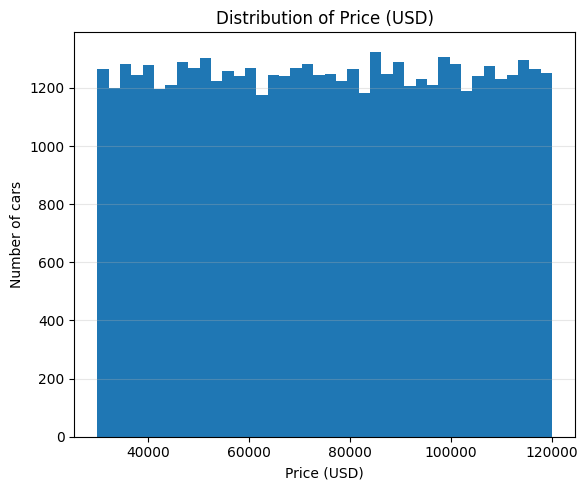

In [19]:
prices = pd.to_numeric(df["price_usd"], errors="coerce").dropna()

plt.figure(figsize=(6,5))
plt.hist(prices, bins=40)
plt.title("Distribution of Price (USD)")
plt.xlabel("Price (USD)")
plt.ylabel("Number of cars")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


Most prices are in a lower–middle range and fewer cars have very high prices. The shape is a bit right-skewed (long tail on the right). A few high values may be outliers like luxury trims or newer models.

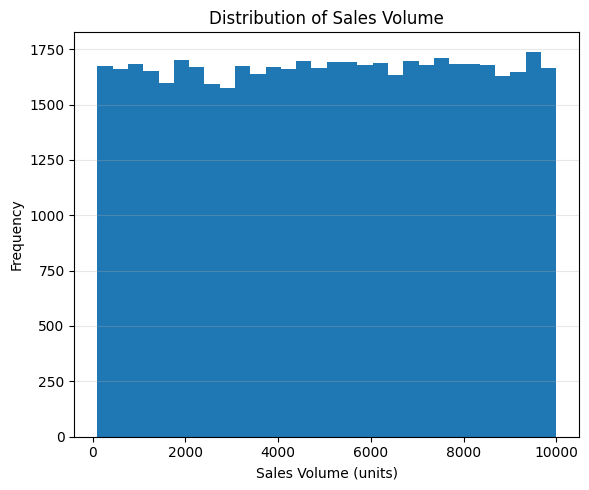

In [20]:
sales = pd.to_numeric(df["sales_volume"], errors="coerce").dropna()

plt.figure(figsize=(6,5))
plt.hist(sales, bins=30)
plt.title("Distribution of Sales Volume")
plt.xlabel("Sales Volume (units)")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()



Sales volume is also uneven. Many rows have lower to medium volumes, and a few rows have very high volumes. The high values likely come from popular models or big regions.

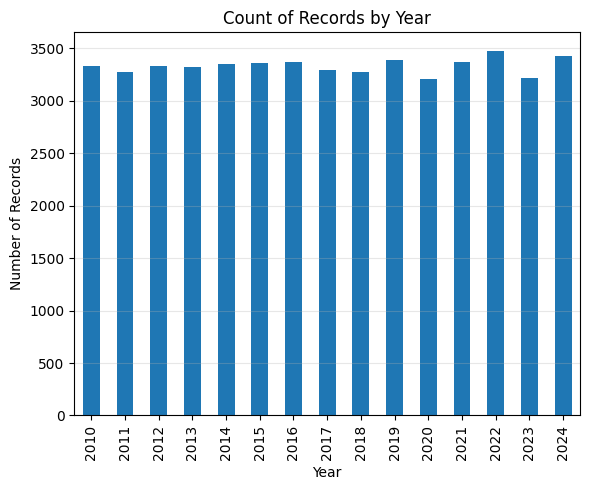

In [21]:
df["year"] = pd.to_numeric(df["year"], errors="coerce")

plt.figure(figsize=(6,5))
df["year"].dropna().astype(int).value_counts().sort_index().plot(kind="bar")
plt.title("Count of Records by Year")
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()



This shows how many rows we have for each year between 2010 and 2024. Any dips may mean fewer entries or missing data for that year.

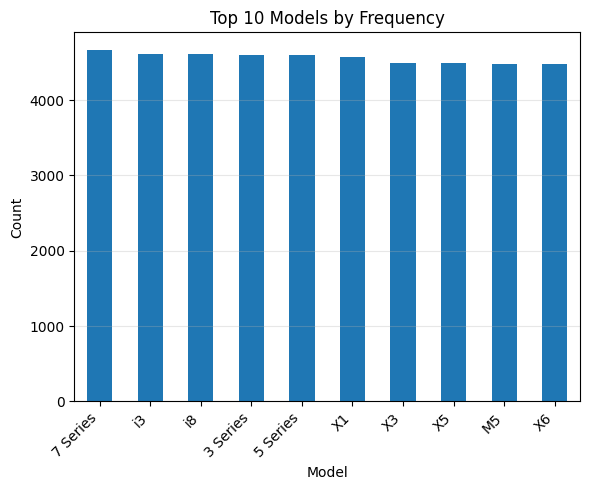

In [22]:
plt.figure(figsize=(6,5))
df["model"].astype(str).value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Models by Frequency")
plt.xlabel("Model")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


These are the 10 models that appear most in the dataset. Models with higher counts show up in more rows (more years/regions recorded). Many other models appear less often.

/tmp/ipython-input-419856840.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=order, patch_artist=True, showfliers=False,


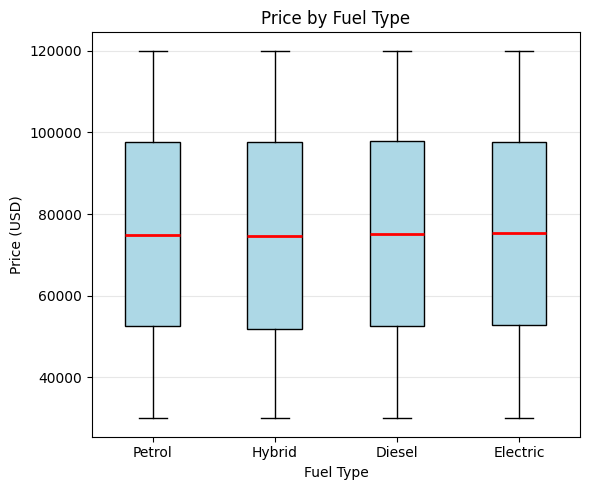

In [23]:
# Prepare data for boxplot
fuel_types = df['fuel_type'].unique()
data = [df[df['fuel_type'] == ft]['price_usd'].dropna() for ft in fuel_types]
order = fuel_types

plt.figure(figsize=(6,5))
plt.boxplot(data, labels=order, patch_artist=True, showfliers=False,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red', linewidth=2))
plt.title("Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Price (USD)")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

This boxplot compares BMW prices for different fuel types.
The boxes look similar, showing that Electric, Diesel, Petrol, and Hybrid vehicles all have roughly the same price range in this dataset.
The median lines are close together, so fuel type alone doesn’t seem to change the price much.

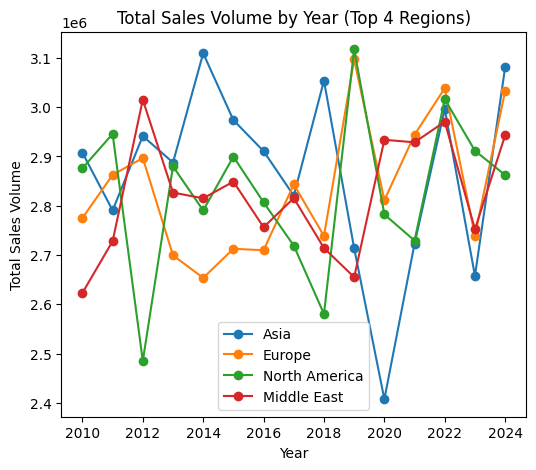

In [24]:
# Make sure these are numbers
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["sales_volume"] = pd.to_numeric(df["sales_volume"], errors="coerce")

# Find the top 4 regions with the highest total sales
top_regions = df.groupby("region")["sales_volume"].sum().nlargest(4).index

# Keep only those regions
filtered = df[df["region"].isin(top_regions)]

# Group by year and region, sum the sales
sales_by_year = filtered.groupby(["year", "region"])["sales_volume"].sum().reset_index()

# Draw one line per region
plt.figure(figsize=(6,5))
for region in top_regions:
    region_data = sales_by_year[sales_by_year["region"] == region]
    plt.plot(region_data["year"], region_data["sales_volume"], marker="o", label=region)

plt.title("Total Sales Volume by Year (Top 4 Regions)")
plt.xlabel("Year")
plt.ylabel("Total Sales Volume")
plt.legend()
plt.show()


This line chart compares total sales volume across the top four regions.
Each line shows how sales changed from 2010 to 2024.
Some regions show steady growth, while others rise and fall over the years, showing how demand differs by location